In [1]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

<font face = "Time New Roman" size = 6>Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

In [2]:
Orginal_data = pd.read_csv('./Combined.csv',encoding = "ISO-8859-1") #Combined data set
Causes_data = pd.read_csv('./Causes.csv',encoding = "ISO-8859-1")  #The data set with causes infomation
Orginal_data.columns #Show the columns of data set

Index(['Campaign Id*', 'Campaign Title', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       ' Campaign Goal ', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO'],
      dtype='object')

In [3]:
Causes_data= Causes_data.fillna(0)  #fill some missing causes data with 0
combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign_ID'])  #Merge two data set togather
Total_Rows = combined_data.shape[0]  #Get the rows number 
print(Total_Rows)  #Print out total rows number 

KeyError: 'Campaign_ID'

In [ ]:
print(combined_data.columns)

Index(['Campaign_ID', 'Campagin_Title ', 'Receiving_NPO_name ',
       'Receiving_NPO_Id', 'NPO_Status_orignal', 'NPO_Status',
       'Number_campaigns_NPO', 'Public_Campaign_Access', 'Creator_Type',
       'Creator_Id', 'Campaign_Status', 'Actual_Donation_Amount',
       'Distinct_Donors', 'Campaign_Goal', 'Campaign_Completion_Rate',
       'Days_Left_for_Campaign', 'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Tax_Deductibility', 'Campaign_Image1', 'Campaign_Image2',
       'Campaign_Image3', 'Campaign_Image4', 'Campaign_Image5',
       'Campaign_Video', 'Impact_Message1', 'Impact_Message2',
       'Impact_Message3', 'Impact_Message4', 'Impact_Message5',
       'Custom_Amount1', 'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Campaign_Title',
       'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
       'Org_Cause_Children_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org

<font face = "Time New Roman" size = 5>
All variables plan to operate, ignnore other columns temporarily
</font>

In [ ]:
Need_variable = ["Actual_Donation_Amount","NPO_Tax_Deductibility", "Distinct_Donors",
"Campaign_Goal","Campaign_Start_Date", "Campaign_End_Date", 
"Campaign_Image1", "Campaign_Image2","Campaign_Image3",
"Campaign_Image4","Campaign_Image5","Campaign_Video",
"Impact_Message1","Impact_Message2","Impact_Message3","Impact_Message4",
"Impact_Message5","Custom_Amount1","Custom_Amount2","Custom_Amount3",
"Custom_Amount4","Description_Campaign","Description_NPO",
'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
'Org_Cause_Children_Youth', 'Org_Cause_Community',
'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
'Org_Cause_Humanitarian', 'Org_Cause_Social Service',
'Org_Cause_Sports', 'Org_Cause_Women_Girls', 'Cam_Cause_Animal_Welfare',
'Cam_Cause_Arts_Heritage', 'Cam_Cause_Children_Youth',
'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education',
'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families',
'Cam_Cause_Health', 'Cam_Cause_Humanitarian',
'Cam_Cause_Social_Service', 'Cam_Cause_Sports', 'Cam_Cause_Women_Girls'
]
extract_data = combined_data[Need_variable]
extract_data

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Cam_Cause_Disability,Cam_Cause_Education,Cam_Cause_Elderly,Cam_Cause_Environment,Cam_Cause_Families,Cam_Cause_Health,Cam_Cause_Humanitarian,Cam_Cause_Social_Service,Cam_Cause_Sports,Cam_Cause_Women_Girls
0,5561.0,True,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,0,0,0,0,0,0,0,Social Service,0,0
1,2810.0,True,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,Disability,0,0,0,0,0,0,0,0,0
2,1118.0,True,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,Disability,0,0,0,0,0,0,0,0,0
3,2800.0,True,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,0,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0
4,2030.0,True,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,True,1,5000,31-Oct-22,1-Jan-23,81619865,81619875,81619884,81619892,...,0,Education,0,0,Families,0,0,0,0,0
15975,150.0,True,4,10000,31-Oct-22,30-Nov-22,81633173,81633175,81633177,0,...,0,0,0,0,0,Health,0,0,0,0
15976,1000.0,True,10,1000,31-Oct-22,30-Nov-22,81633197,81633199,81633301,0,...,0,0,0,0,0,Health,0,0,0,0
15977,120.0,True,2,3000,31-Oct-22,31-Dec-22,81635545,81635580,0,0,...,0,0,0,0,0,0,0,Social Service,0,Women & Girls


<font face = "Time New Roman" size = 5>"Actual_Donation_Amount" "Campaign_Video" "Impact_Message1" "Impact_Message2" "Impact_Message3" "Impact_Message4" and "Impact_Message5" are many missing data, fill them first so that it's more convenient to operate. </font>

In [ ]:
extract_data['NPO_Tax_Deductibility'] = extract_data['NPO_Tax_Deductibility'].fillna('0')
extract_data['Campaign_Start_Date'] = extract_data['Campaign_Start_Date'].fillna('0')
extract_data['Campaign_End_Date'] = extract_data['Campaign_End_Date'].fillna('0')
extract_data['Actual_Donation_Amount'] = extract_data['Actual_Donation_Amount'].fillna('0')
extract_data['Actual_Donation_Amount'] = pd.to_numeric( extract_data['Actual_Donation_Amount'])
extract_data['Distinct_Donors'] = extract_data['Distinct_Donors'].fillna('')
extract_data['Distinct_Donors'] = pd.to_numeric( extract_data['Distinct_Donors']) 
extract_data['Campaign_Video'] = extract_data['Campaign_Video'].fillna('0')
extract_data['Impact_Message1'] = extract_data['Impact_Message1'].fillna('0')
extract_data['Impact_Message2'] = extract_data['Impact_Message2'].fillna('0')
extract_data['Impact_Message3'] = extract_data['Impact_Message3'].fillna('0')
extract_data['Impact_Message4'] = extract_data['Impact_Message4'].fillna('0')
extract_data['Impact_Message5'] = extract_data['Impact_Message5'].fillna('0')

In [ ]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Actual_Donation_Amount    15979 non-null  float64
 1   NPO_Tax_Deductibility     15979 non-null  object 
 2   Distinct_Donors           15979 non-null  int64  
 3   Campaign_Goal             15979 non-null  int64  
 4   Campaign_Start_Date       15979 non-null  object 
 5   Campaign_End_Date         15979 non-null  object 
 6   Campaign_Image1           15979 non-null  int64  
 7   Campaign_Image2           15979 non-null  int64  
 8   Campaign_Image3           15979 non-null  int64  
 9   Campaign_Image4           15979 non-null  int64  
 10  Campaign_Image5           15979 non-null  int64  
 11  Campaign_Video            15979 non-null  object 
 12  Impact_Message1           15979 non-null  object 
 13  Impact_Message2           15979 non-null  object 
 14  Impact

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [ ]:
extract_data.columns

Index(['Actual_Donation_Amount', 'NPO_Tax_Deductibility', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Start_Date', 'Campaign_End_Date',
       'Campaign_Image1', 'Campaign_Image2', 'Campaign_Image3',
       'Campaign_Image4', 'Campaign_Image5', 'Campaign_Video',
       'Impact_Message1', 'Impact_Message2', 'Impact_Message3',
       'Impact_Message4', 'Impact_Message5', 'Custom_Amount1',
       'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_Heritage', 'Org_Cause_Children_Youth',
       'Org_Cause_Community', 'Org_Cause_Disability', 'Org_Cause_Education',
       'Org_Cause_Elderly', 'Org_Cause_Environment', 'Org_Cause_Families',
       'Org_Cause_Health', 'Org_Cause_Humanitarian',
       'Org_Cause_Social Service', 'Org_Cause_Sports', 'Org_Cause_Women_Girls',
       'Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_Heritage',
       'Cam_Cause_Children_Youth', 'Cam_Cause_Communi

In [ ]:
num_deductibility = 0
extract_data['Donation_per_donor'] = 0

for j in range(len(extract_data["Actual_Donation_Amount"])):
    if extract_data["Distinct_Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Actual_Donation_Amount'].iloc[j]/extract_data['Distinct_Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['NPO_Tax_Deductibility'].iloc[j] == True:
        extract_data.loc[j, 'NPO_Tax_Deductibility'] = 1
        num_deductibility += 1
    else:
        extract_data.loc[j, 'NPO_Tax_Deductibility'] = 0
print("Number of deductibility:", num_deductibility)

Number of deductibility: 14998


# <font size =6 face = 'time new roman' color = red> Here is the Number of deducbility: 14998/15979 = 93.86%</font>

# <font size =6 face = 'time new roman'> Calculate the numbers of "org_causes" and "camp_causes" </font>

In [ ]:
Org_causes = ['Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
       'Org_Cause_Children_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
       'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
       'Org_Cause_Humanitarian', 'Org_Cause_Social Service',
       'Org_Cause_Sports', 'Org_Cause_Women_Girls', 'Cam_Cause_Animal_Welfare',
       ]
Cam_causes = ['Cam_Cause_Arts_Heritage', 'Cam_Cause_Children_Youth',
       'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education',
       'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families',
       'Cam_Cause_Health', 'Cam_Cause_Humanitarian',
       'Cam_Cause_Social_Service', 'Cam_Cause_Sports',
       'Cam_Cause_Women_Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != 0 else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != 0 else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [ ]:
Add_Campaign_Image_num = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Campaign_Image_num"] = Add_Campaign_Image_num(extract_data["Campaign_Image1"],extract_data["Campaign_Image2"],extract_data["Campaign_Image3"],extract_data["Campaign_Image4"],extract_data["Campaign_Image5"])

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [ ]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)
extract_data["Campaign_Video"] = Video_or_not(extract_data["Campaign_Video"])

<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [ ]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['duration_day'] = '0'
i = 0

# Get the detail infomation of data
for row in extract_data['Campaign_Start_Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] = month_dictionary[ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data.loc[i, 'Campaign_Start_Year'] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'duration_day'] = (datetime.strptime(extract_data.loc[i, 'Campaign_End'], '%Y-%m-%d') - datetime.strptime(extract_data.loc[i,'Campaign_Start'], '%Y-%m-%d')).days
#    if extract_data.loc[i, 'duration_day'] < 0:
#        extract_data.loc[i, 'duration_day'] = 0
    i += 1

# <font size =6 face = 'time new roman' >Here delete the rows where duration_day less than 1</font>

In [ ]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'duration_day'] <= 1:
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where duraiton less than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where duraiton less than 0: 180


In [ ]:
Impact_msg_list = ['Impact_Message1','Impact_Message2','Impact_Message3','Impact_Message4','Impact_Message5']
#Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

#for j in range(len(Impact_msg_list)):
#    cnt=0
#    for s in extract_data[Impact_msg_list[j]]:
#        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
#        cnt += 1
cnt=0

In [ ]:
# Nunber of description words
extract_data['Num_desc_cam'] = 0
extract_data['Num_desc_NPO'] = 0
for index, row in extract_data.iterrows():
    extract_data.loc[index, 'Num_desc_cam'] = sentence_length( str(extract_data.loc[index, 'Description_Campaign']))
    extract_data.loc[index, 'Num_desc_NPO'] = sentence_length( str(extract_data.loc[index, 'Description_NPO']))


# <font size =6 face = 'time new roman' color = red>Remove the NPO with blank description</font>

In [ ]:
num1 = 0

for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Num_desc_NPO'] <= 1:
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete numbers where Num_desc_NPO less than 1:", num1)  

Total_Rows = extract_data.shape[0]



Total delete numbers where Num_desc_NPO less than 1: 2572


# 把description内容筛选一遍

In [ ]:
num2 = 0
num3 = 0
for index, row in extract_data.iterrows():
    if "test" in str(extract_data.loc[index, 'Description_Campaign']) or "Test" in str(extract_data.loc[index, 'Description_Campaign']) and extract_data.loc[index, 'Num_desc_cam']< 10:
        #extract_data.drop(index, inplace=True)
        num2 += 1
    if extract_data.loc[index, 'Num_desc_cam']< 5:
        num2 += 1
print("Total delete numbers:", num2)  


Total delete numbers: 475


In [ ]:
extract_data['Cam_Org_causes'] = extract_data['Org_causes']-extract_data['Cam_causes']

# Average donation per donator

In [ ]:
# extract_data['Avg_donation_amount'] =  extract_data['Actual_Donation_Amount']/extract_data['Distinct_Donors']

# <font size =6 face = 'time new roman' >Here delete the rows where Actual_Donation_Amount is 0 but Distinct_Donors bigger than 0</font>

In [ ]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount'] <= 0 and extract_data.loc[index,'Distinct_Donors'] > 0 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0: 99


In [ ]:
extract_data['Avg_Custom_Amount'] = (extract_data['Custom_Amount1']+extract_data['Custom_Amount2'] +extract_data['Custom_Amount3'] + extract_data['Custom_Amount4'] )/4


In [ ]:
extract_data[0:10]

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Campaign_End_Day,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,duration_day,Num_desc_cam,Num_desc_NPO,Cam_Org_causes,Avg_Custom_Amount
0,5561.0,1,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,10,9,2017,2017-1-1,2017-9-10,252,161,163,2,90.0
1,2810.0,1,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,31,3,2017,2017-1-1,2017-3-31,89,209,164,3,90.0
2,1118.0,1,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,28,2,2017,2017-1-1,2017-2-28,58,155,164,3,90.0
3,2800.0,1,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,31,3,2017,2017-1-2,2017-3-31,88,160,92,0,0.0
4,2030.0,1,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,20,2,2017,2017-1-1,2017-2-20,50,65,164,2,0.0
6,1050.0,1,20,1000,3-Jan-17,7-Feb-17,4733693,4733902,4733910,4733918,...,7,2,2017,2017-1-3,2017-2-7,35,159,128,3,0.0
7,4060.0,0,69,5000,3-Jan-17,31-Dec-17,4755544,3729434,4755552,4755560,...,31,12,2017,2017-1-3,2017-12-31,362,85,58,4,90.0
8,550.0,1,6,500,3-Jan-17,14-Feb-17,4734966,4734974,4734982,4734998,...,14,2,2017,2017-1-3,2017-2-14,42,32,157,3,0.0
9,38844.0,1,51,2000000,3-Jan-17,3-Jan-18,4735642,4735650,4735658,4735666,...,3,1,2018,2017-1-3,2018-1-3,365,57,163,2,90.0
10,37805.0,1,537,75000,9-Jan-17,31-May-17,4933491,4933483,4736946,4736954,...,31,5,2017,2017-1-9,2017-5-31,142,178,111,1,90.0


# <font size =6 face = 'time new roman' >Divide 5 messages into 4 category (old version)</font>

In [ ]:
#extract_data['Msg1_category'] = 0
#extract_data['Msg2_category'] = 0
#extract_data['Msg3_category'] = 0
#extract_data['Msg4_category'] = 0
#extract_data['Msg5_category'] = 0
#
extract_data['Msg_category'] = 0



for index,row in extract_data.iterrows():
    last_category = 0
    current_category = 0
    final_category = 0
    for index_col in Impact_msg_list:
        s = extract_data.loc[index, index_col]
        if(sentence_length(s)<=2): # Write nothing
            current_category = 0
        else:
            if(sentence_length(s)<=10): # Write very little
                current_category = 1
            else:
                if(sentence_length(s)<20): # Write very little
                    current_category = 2
                else:
                    current_category = 3
        if(current_category == last_category):
            last_category = current_category
        else:
            last_category = current_category if current_category>last_category else last_category # if different choose higher one
    #Msg_length = sentence_length(s)
    extract_data.loc[index,'Msg_category'] =  last_category #0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
    cnt += 1
 


# <font size =6 face = 'time new roman' >Divide 5 messages into 4 category (new version)</font>

In [ ]:
import distance
extract_data['Total_distance'] = 0
def edit_distance(s1, s2):
    return distance.levenshtein(s1, s2)
for j in range(len(Impact_msg_list)-2):
    for i in range(extract_data[Impact_msg_list[j]].shape[0]):
        str1 = extract_data[Impact_msg_list[j]].iloc[i]
        str2 = extract_data[Impact_msg_list[j+1]].iloc[i]
        extract_data['Total_distance'].iloc[i] += edit_distance(str1, str2)



In [ ]:
# besed on length and distance to divide into three new category
extract_data['new_msg_category'] = 0
for index,row in extract_data.iterrows():
    if extract_data.loc[index,'Msg_category'] == 1 or extract_data.loc[index,'Msg_category'] == 2 or extract_data.loc[index,'Msg_category'] == 3:
        if extract_data.loc[index,'Total_distance'] >150:
            extract_data.loc[index,'new_msg_category'] = 3
        else:
            if extract_data.loc[index,'Total_distance'] > 0:
                extract_data.loc[index,'new_msg_category'] = 2
            else:
                extract_data.loc[index,'new_msg_category'] = 1

extract_data.iloc[0:30,28:]

,Org_Cause_Education,Org_Cause_Elderly,Org_Cause_Environment,Org_Cause_Families,Org_Cause_Health,Org_Cause_Humanitarian,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,...,Campaign_Start,Campaign_End,duration_day,Num_desc_cam,Num_desc_NPO,Cam_Org_causes,Avg_Custom_Amount,Msg_category,Total_distance,new_msg_category
0,0,0,0,Families,Health,0,Social Service,0,0,0,...,2017-1-1,2017-9-10,252,161,163,2,90.0,3,347,3
1,0,0,0,0,0,0,Social Service,0,0,0,...,2017-1-1,2017-3-31,89,209,164,3,90.0,2,218,3
2,0,0,0,0,0,0,Social Service,0,0,0,...,2017-1-1,2017-2-28,58,155,164,3,90.0,2,218,3
3,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0,0,...,2017-1-2,2017-3-31,88,160,92,0,0.0,0,0,0
4,0,0,0,0,Health,0,Social Service,0,0,0,...,2017-1-1,2017-2-20,50,65,164,2,0.0,0,0,0
6,Education,0,0,Families,Health,0,0,0,0,0,...,2017-1-3,2017-2-7,35,159,128,3,0.0,0,0,0
7,Education,0,Environment,0,0,0,0,0,0,Animal Welfare,...,2017-1-3,2017-12-31,362,85,58,4,90.0,1,4,2
8,0,Elderly,0,Families,0,0,0,0,0,0,...,2017-1-3,2017-2-14,42,32,157,3,0.0,0,0,0
9,Education,Elderly,0,0,Health,0,0,0,0,0,...,2017-1-3,2018-1-3,365,57,163,2,90.0,2,4,2
10,0,Elderly,0,Families,0,0,0,0,0,0,...,2017-1-9,2017-5-31,142,178,111,1,90.0,3,186,3


Polarity and subjectivity

In [ ]:
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0
extract_data['Description_Campaign_polarity'] = 0
extract_data['Description_Campaign_subjectivity'] = 0

from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
Impact_msg_list = ['Impact_Message1','Impact_Message2','Impact_Message3','Impact_Message4','Impact_Message5','Description_Campaign']
Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity','Description_Campaign_polarity']
Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity','Description_Campaign_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(str(i))
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]


,Org_Cause_Education,Org_Cause_Elderly,Org_Cause_Environment,Org_Cause_Families,Org_Cause_Health,Org_Cause_Humanitarian,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,...,Msg3_polarity,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity
0,0,0,0,Families,Health,0,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405556,0.666667,0.350000,0.550000
1,0,0,0,0,0,0,Social Service,0,0,0,...,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.328247,0.420563,0.200000,0.241667
2,0,0,0,0,0,0,Social Service,0,0,0,...,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.421733,0.557711,0.200000,0.241667
3,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307500,0.490000,0.000000,0.000000
4,0,0,0,0,Health,0,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125000,0.200000,0.000000,0.000000
6,Education,0,0,Families,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266544,0.640122,0.000000,0.000000
7,Education,0,Environment,0,0,0,0,0,0,Animal Welfare,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162245,0.483673,0.000000,0.000000
8,0,Elderly,0,Families,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197917,0.341667,0.000000,0.000000
9,Education,Elderly,0,0,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.625000,0.000000,0.000000
10,0,Elderly,0,Families,0,0,0,0,0,0,...,0.000000,0.000000,0.100000,0.350000,0.650000,0.600000,0.126389,0.436111,0.694048,1.134524


In [ ]:
from textblob import TextBlob
blob = TextBlob(str("So sad, unhappy. Catastrophe, fear"))
sentiment = blob.sentiment
print(sentiment.polarity)

-0.55


<font face = "Time New Roman" size = 5>  Convert to numeric type</font>

In [ ]:

extract_data['duration_day'] = pd.to_numeric( extract_data['duration_day'])
#extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['NPO_Tax_Deductibility'] = pd.to_numeric(extract_data['NPO_Tax_Deductibility'])


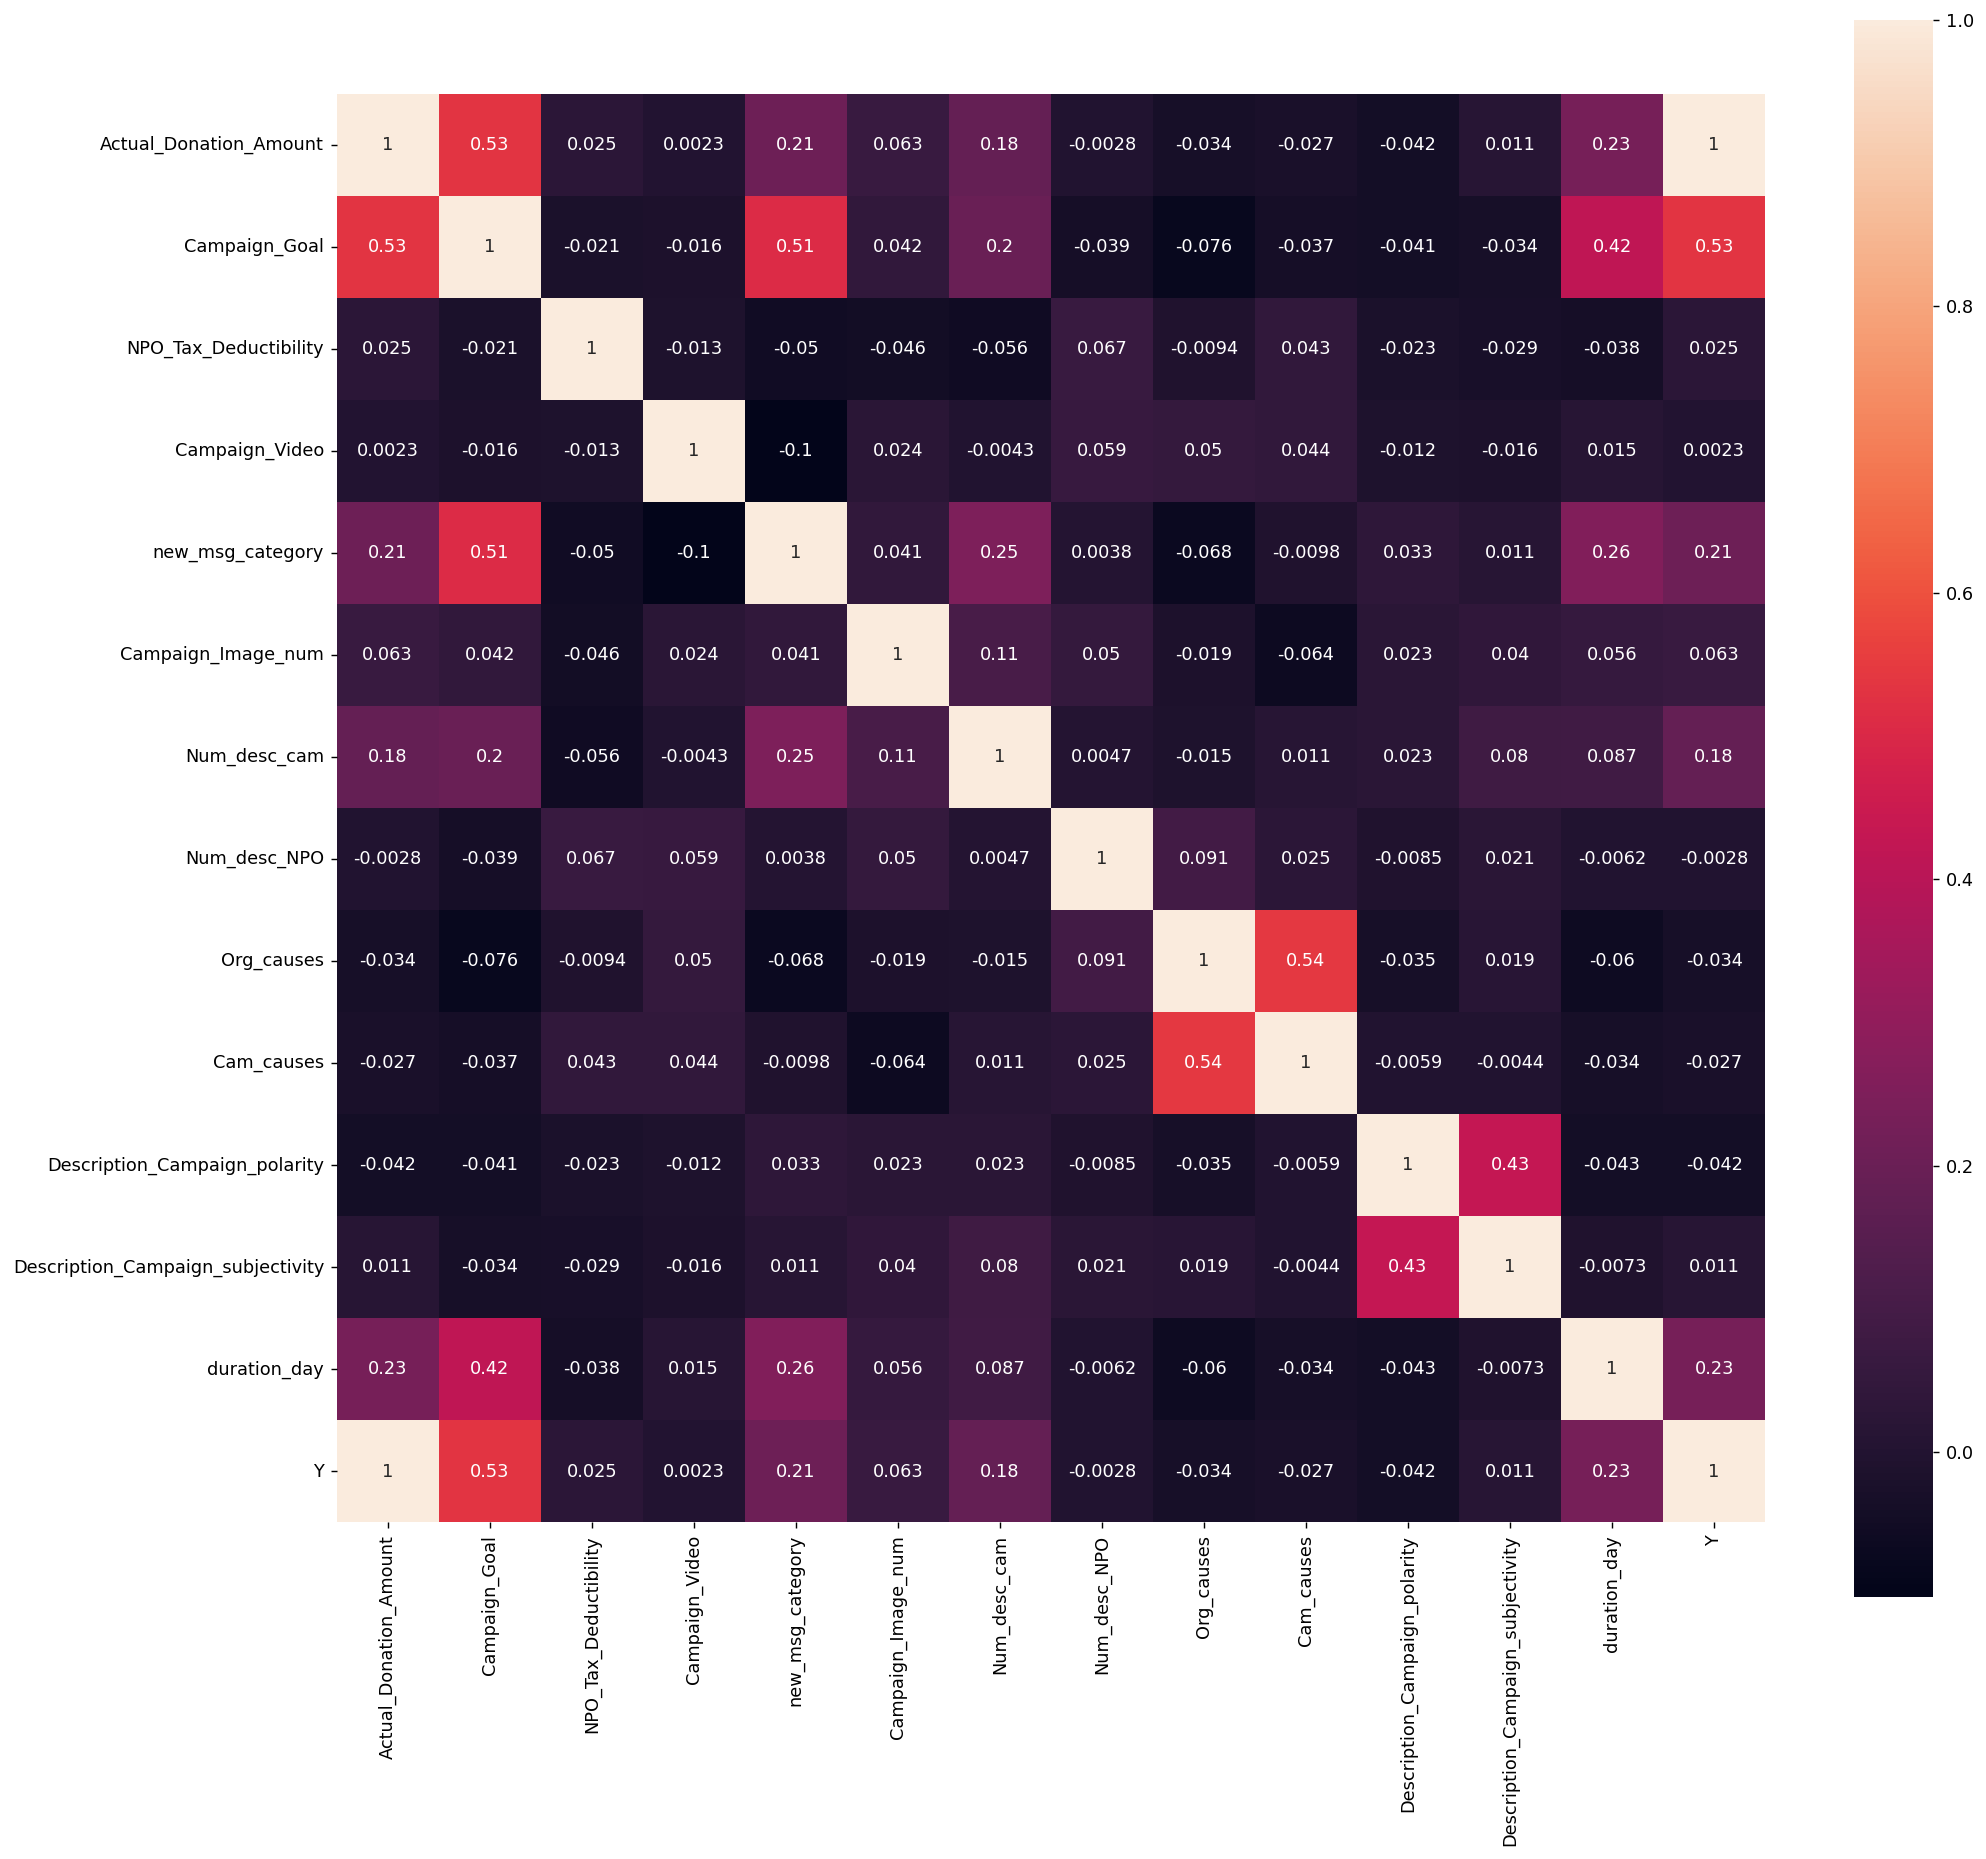

In [ ]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Actual_Donation_Amount', 'Campaign_Goal', 'NPO_Tax_Deductibility',
                     'Campaign_Video','new_msg_category',
                     'Campaign_Image_num','Num_desc_cam', 'Num_desc_NPO', 'Org_causes', 'Cam_causes',
                     'Description_Campaign_polarity','Description_Campaign_subjectivity', 'duration_day']

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Actual_Donation_Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

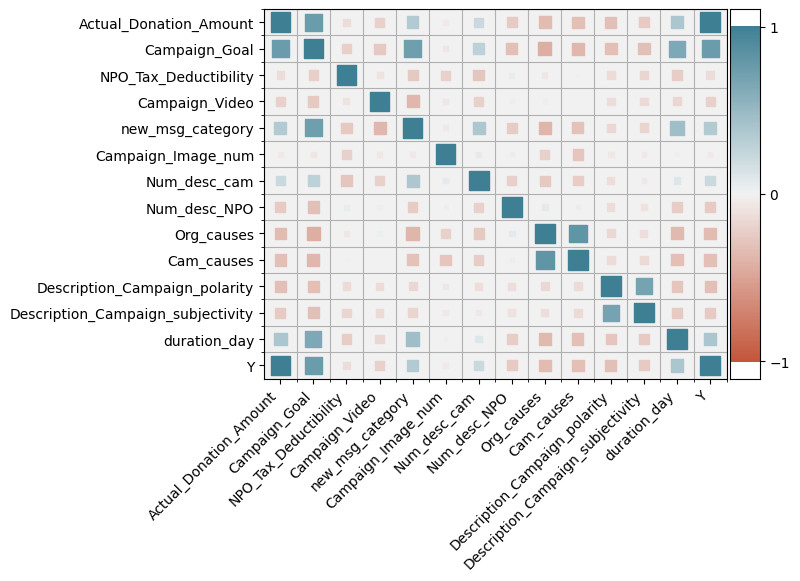

In [ ]:
from heatmap import heatmap, corrplot
corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [ ]:

def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features1]
for i in numeric_features1:
	print(i, "\t", vif(df=test_data, col_i=i))


Actual_Donation_Amount 	 1.5087491495788505
Campaign_Goal 	 1.595715925016609
NPO_Tax_Deductibility 	 1.01667045832521
Campaign_Video 	 1.0211705503448625
new_msg_category 	 1.1781351429434603
Campaign_Image_num 	 1.0238812011160334
Num_desc_cam 	 1.0977498011499727
Num_desc_NPO 	 1.0289990315192064
Org_causes 	 1.518114917620906
Cam_causes 	 1.4833572901773853
Description_Campaign_polarity 	 1.2058800428447831
Description_Campaign_subjectivity 	 1.2189127019604773
duration_day 	 1.094697636418278


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

#x = test_data
x = add_constant(test_data)

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(vif)


[64.4924906270665, 1.5087491495788505, 1.595715925016609, 1.01667045832521, 1.0211705503448625, 1.1781351429434603, 1.0238812011160334, 1.0977498011499727, 1.0289990315192066, 1.518114917620906, 1.4833572901773853, 1.2058800428447831, 1.218912701960477, 1.094697636418278]


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(tol)


[0.015505681208415223, 0.6628007049940264, 0.6266779596058687, 0.9836028890298714, 0.979268350093221, 0.8487990584013932, 0.9766758085899, 0.9109543895634755, 0.9718182130099845, 0.6587116616752157, 0.674146415446825, 0.8292698813066903, 0.8204032974565103, 0.9134942533281449]


# <font size =6 face = 'time new roman' color = red> Based on the result only the "Custom_Amount1-4" 's multi collinearity is high. Other variables seem reasonable.</font>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant 
X = test_data  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds) 

Actual_Donation_Amount                1.553254
Campaign_Goal                         1.744870
NPO_Tax_Deductibility                13.073897
Campaign_Video                        1.582013
new_msg_category                      2.248050
Campaign_Image_num                    4.693321
Num_desc_cam                          5.503231
Num_desc_NPO                         10.742474
Org_causes                           26.722468
Cam_causes                           18.573258
Description_Campaign_polarity         2.468250
Description_Campaign_subjectivity    11.580270
duration_day                          2.228952
dtype: float64


In [ ]:
'''
Clean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr

     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)

     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')

'''

"\nClean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr\n\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)\n\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n\n"

In [ ]:
extract_data

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Msg3_polarity,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity
0,5561.0,1,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,0.000000,0.000000,0.0000,0.0,0.000,0.00,4.055556e-01,0.666667,0.350000,0.550000
1,2810.0,1,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,0.200000,0.241667,0.0000,0.0,0.000,0.00,3.282468e-01,0.420563,0.200000,0.241667
2,1118.0,1,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,0.200000,0.241667,0.0000,0.0,0.000,0.00,4.217330e-01,0.557711,0.200000,0.241667
3,2800.0,1,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,0.000000,0.000000,0.0000,0.0,0.000,0.00,3.075000e-01,0.490000,0.000000,0.000000
4,2030.0,1,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,0.000000,0.000000,0.0000,0.0,0.000,0.00,-1.250000e-01,0.200000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,1,1,5000,31-Oct-22,1-Jan-23,81619865,81619875,81619884,81619892,...,0.000000,0.000000,0.0000,0.0,0.000,0.00,1.545455e-01,0.300000,0.000000,0.000000
15975,150.0,1,4,10000,31-Oct-22,30-Nov-22,81633173,81633175,81633177,0,...,0.000000,0.000000,0.0000,0.0,0.000,0.00,1.009294e-17,0.356439,0.000000,0.000000
15976,1000.0,1,10,1000,31-Oct-22,30-Nov-22,81633197,81633199,81633301,0,...,0.000000,0.000000,0.0000,0.0,0.000,0.00,1.009294e-17,0.356439,0.000000,0.000000
15977,120.0,1,2,3000,31-Oct-22,31-Dec-22,81635545,81635580,0,0,...,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.000000e+00,0.000000,0.000000,0.000000


<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [ ]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [ ]:
for title in numeric_features1:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    #print( title, "Variance:" ,np.var(extract_data[title]))
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))
    

Actual_Donation_Amount Median: 11939.92946374162
Actual_Donation_Amount Std: 69297.91054565096
Actual_Donation_Amount Min: 10.0
Actual_Donation_Amount Max: 3431670.0
Campaign_Goal Median: 49475.13764472882
Campaign_Goal Std: 161485.9733124178
Campaign_Goal Min: 100
Campaign_Goal Max: 5000000
NPO_Tax_Deductibility Median: 0.943860450944546
NPO_Tax_Deductibility Std: 0.2301910078332867
NPO_Tax_Deductibility Min: 0
NPO_Tax_Deductibility Max: 1
Campaign_Video Median: 0.3566422912858013
Campaign_Video Std: 0.47900789904991653
Campaign_Video Min: 0
Campaign_Video Max: 1
new_msg_category Median: 1.1789305301645339
new_msg_category Std: 1.230598741298057
new_msg_category Min: 0
new_msg_category Max: 3
Campaign_Image_num Median: 3.0302407068860453
Campaign_Image_num Std: 1.5564973225956016
Campaign_Image_num Min: 0
Campaign_Image_num Max: 5
Num_desc_cam Median: 140.6304082876295
Num_desc_cam Std: 68.31215806906323
Num_desc_cam Min: 1
Num_desc_cam Max: 294
Num_desc_NPO Median: 120.93449116392443

# Version 7 model

In [ ]:

import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Tax_Deductibility  +Campaign_Video+ Total_distance+ \
    Campaign_Image_num  + Num_desc_cam  + Num_desc_NPO + Org_causes + Cam_causes + Description_Campaign_polarity+\
     Description_Campaign_subjectivity + Avg_Custom_Amount', data = extract_data).fit()

results2 = model2.summary()
print(results2)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.340
Model:                                OLS   Adj. R-squared:                  0.339
Method:                     Least Squares   F-statistic:                     562.2
Date:                    Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                            00:21:57   Log-Likelihood:            -1.6223e+05
No. Observations:                   13128   AIC:                         3.245e+05
Df Residuals:                       13115   BIC:                         3.246e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Testing

In [ ]:
import statsmodels.formula.api as smf
X = extract_data[['Campaign_Goal' , 'Campaign_Image_num' , 'Num_desc_NPO' , 'Cam_causes' , 'Description_Campaign_subjectivity' ,  'duration_day']] 
Y = extract_data['Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
predicts = model1._results
print(results1)

model2 = smf.ols(formula = 'Actual_Donation_Amount ~  ', data = extract_data).fit()

results2 = model2.summary()
print(results2)


                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.334
Model:                                OLS   Adj. R-squared:                  0.334
Method:                     Least Squares   F-statistic:                     1098.
Date:                    Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                            21:16:22   Log-Likelihood:            -1.6228e+05
No. Observations:                   13128   AIC:                         3.246e+05
Df Residuals:                       13121   BIC:                         3.246e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

PatsyError: expected a noun, but instead the expression ended
    Actual_Donation_Amount ~
                           ^

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [ ]:

import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Tax_Deductibility  +Campaign_Video+ new_msg_category+ \
    Campaign_Image_num  + Num_desc_cam  + Num_desc_NPO + Org_causes + Cam_causes + Description_Campaign_polarity+\
     Description_Campaign_subjectivity + duration_day', data = extract_data).fit()

results2 = model2.summary()
print(results2)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.337
Model:                                OLS   Adj. R-squared:                  0.337
Method:                     Least Squares   F-statistic:                     556.0
Date:                    Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                            00:21:57   Log-Likelihood:            -1.6226e+05
No. Observations:                   13128   AIC:                         3.245e+05
Df Residuals:                       13115   BIC:                         3.246e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:
import statsmodels.formula.api as smf

X = extract_data[['Campaign_Goal', 'NPO_Tax_Deductibility',  'Campaign_Video', 'new_msg_category', \
    'Campaign_Image_num',  'Num_desc_cam',  'Num_desc_NPO' , 'Org_causes', 'Cam_causes', 'Description_Campaign_polarity',\
     'Description_Campaign_subjectivity', 'duration_day']] 
Y = extract_data['Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
predicts = model1._results
print(results1)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.337
Model:                                OLS   Adj. R-squared:                  0.337
Method:                     Least Squares   F-statistic:                     556.0
Date:                    Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                            00:49:25   Log-Likelihood:            -1.6226e+05
No. Observations:                   13128   AIC:                         3.245e+05
Df Residuals:                       13115   BIC:                         3.246e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:
# Output new csv file
extract_data.to_csv('Cleaned_data_version7.csv')

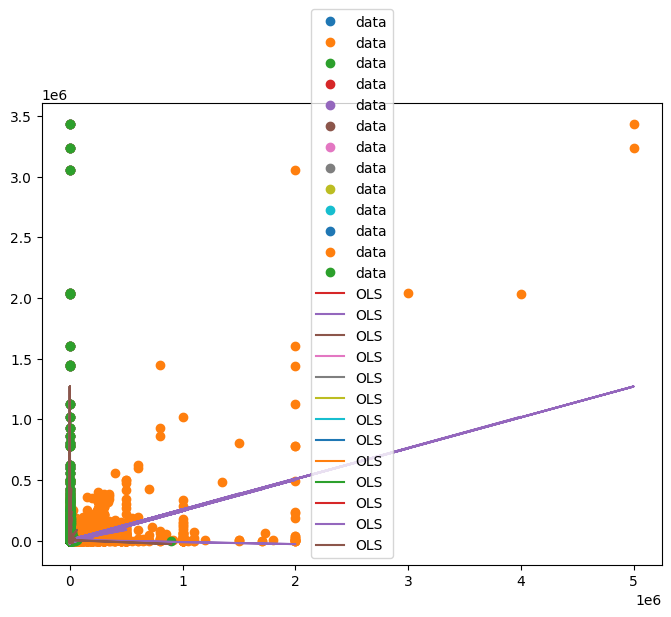

In [ ]:
y_fitted = model1.fittedvalues
x = np.linspace(0, Total_Rows-1,Total_Rows)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, Y, 'o', label='data')
ax.plot(X, y_fitted,label='OLS')
ax.legend(loc='best')

In [ ]:
np.linspace(0, Total_Rows-1,Total_Rows)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.3125e+04, 1.3126e+04,
       1.3127e+04])

<font face = "Time New Roman" size = 5 color = red> Randomly choose 50 points of prediction and actual data to compare</font>

<font face = "Time New Roman" size = 5 color = red> Circle is actual donation star is regression result</font>

In [ ]:
from random import sample
mysample = sample(range(0,Total_Rows), 50)
x = combined_data['Campaign_ID'][mysample]
y = extract_data['Actual_Donation_Amount'][mysample]
y_fitted = model2.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted[mysample],'*',label='OLS')

<font face = "Time New Roman" size = 5 color = red>Test normality.</font>

In [ ]:
import openturns as ot
from statsmodels.stats.diagnostic import lilliefors
model_resid = model2.resid
result = lilliefors(list(model_resid))
print(result)

(0.3171770958761979, 0.0009999999999998899)


In [ ]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(list(model_resid), dist='norm')
print('stat=%.3f' % (result.statistic))
print('significance_level:', (result.significance_level))

stat=2602.771
significance_level: [15.  10.   5.   2.5  1. ]


(array([1.3000e+01, 6.0000e+00, 4.0000e+00, 6.2000e+01, 4.8000e+01,
        3.8600e+02, 1.2038e+04, 4.5800e+02, 5.6000e+01, 2.7000e+01,
        1.0000e+01, 4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-502807.23534656, -426452.94667482, -350098.65800308,
        -273744.36933134, -197390.0806596 , -121035.79198786,
         -44681.50331612,   31672.78535562,  108027.07402736,
         184381.3626991 ,  260735.65137084,  337089.94004258,
         413444.22871432,  489798.51738606,  566152.8060578 ,
         642507.09472954,  718861.38340128,  795215.67207302,
         871569.96074476,  947924.2494165 , 1024278.53808824,
        1100632.8267

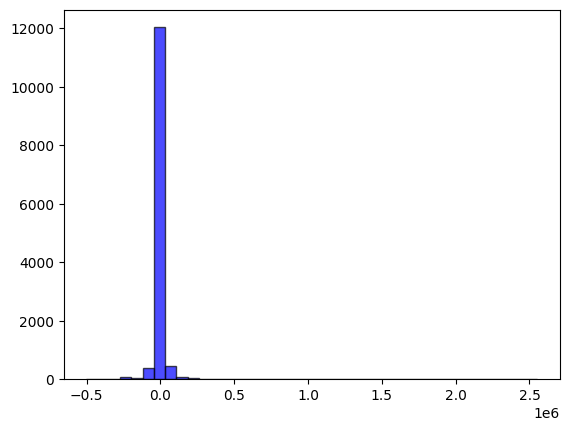

In [ ]:

plt.hist(model2.resid, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)


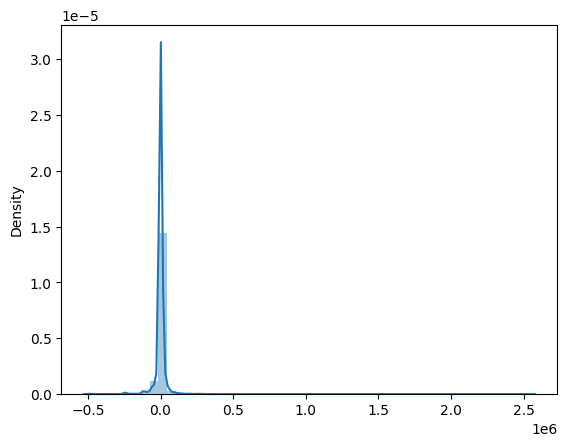

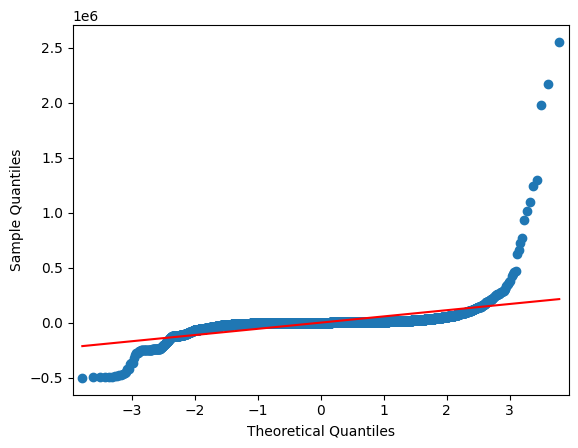

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

# 样例1



res = model2.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法
sns.distplot(res)
plt.show()
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s') # 调用函数

plt.show()

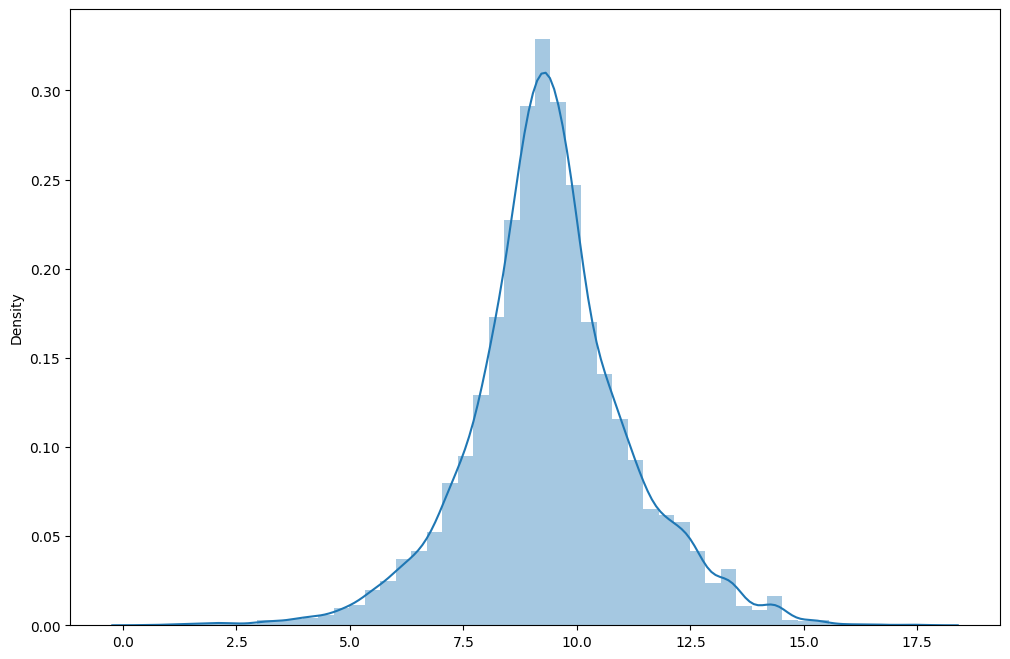

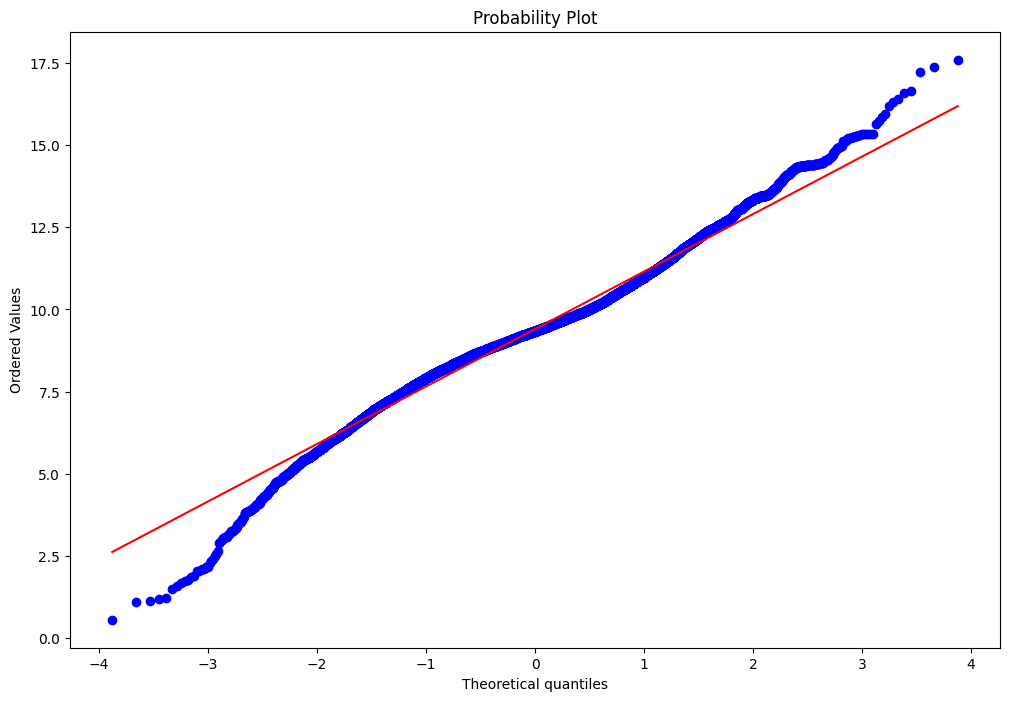

In [ ]:
from scipy.stats import norm, skew #for some statistics
res2 = abs(model_resid)
fig, ax = plt.subplots(figsize=[12,8])
converted_data1 = stats.boxcox(res2)[0] #对数据进行BOX-COX变换
sns.distplot(converted_data1)
plt.show()
fig, ax = plt.subplots(figsize=[12,8])
prob = stats.probplot(converted_data1, dist=stats.norm, plot=ax) #生成Q-Q图
plt.show()


<font face = "Time New Roman" size = 5 color =red> Model 2</font>

In [ ]:
model_resid2 = model2.resid
result = lilliefors(list(model_resid2))
print(result)

(0.3166991231981999, 0.0009999999999998899)


In [ ]:
variables_data3

NameError: name 'variables_data3' is not defined

<font face = "Time New Roman" size = 5 color =red> Model 3</font>

In [ ]:
variables_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual_Donation_Amount  15979 non-null  float64
 1   Campaign_Goal           15979 non-null  int64  
 2   NPO_Tax_Deductibility   15979 non-null  int64  
 3   duration_day            15979 non-null  int64  
 4   Campaign_Image_num      15979 non-null  int64  
 5   Campaign_Video          15979 non-null  int64  
 6   Msg_category            15979 non-null  int64  
 7   Num_desc_cam            15979 non-null  int64  
 8   Num_desc_NPO            15979 non-null  int64  
 9   Org_causes              15979 non-null  int64  
 10  Cam_causes              15979 non-null  int64  
 11  Custom_Amount1          15979 non-null  int64  
 12  Custom_Amount2          15979 non-null  int64  
 13  Custom_Amount3          15979 non-null  int64  
 14  Custom_Amount4          15979 non-null

In [ ]:
model3 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + NPO_Tax_Deductibility + duration_day + \
    Campaign_Image_num  + Campaign_Video + Msg_category+\
    Num_desc_cam + Num_desc_NPO + Org_causes + Cam_causes', data = variables_data3).fit()

results3 = model3.summary()
print(results3)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.307
Model:                                OLS   Adj. R-squared:                  0.306
Method:                     Least Squares   F-statistic:                     706.9
Date:                    Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                            23:47:28   Log-Likelihood:            -1.9632e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15968   BIC:                         3.927e+05
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# Residuals

In [ ]:
model.resid

0        -6502.023006
1        -6383.130003
2       -10109.009621
3         3680.179976
4          -31.460896
             ...     
15974    -1809.426473
15975     -307.708669
15976     2575.192535
15977     1031.338847
15978    -4940.357032
Length: 15979, dtype: float64

Author: Guo Shiping
Created by 27/Jan/2023